# Expression Vector Field

Plot vector fields based on OSK expression. Idea is that cells can only move in the direction of decreasing OSK expression over time (assuming all exogenous OSK). In reality OS also have endogenous expression later.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc
from collections import Counter

In [6]:
import scvelo as scv

### Cluster Config

In [ ]:
cluster_config = pd.read_csv("../../figures_factory/configs/cluster.tsv", sep='\t')
cluster_config

In [5]:
endo_exo_quants = pd.read_csv("../20211106_sendai_vs_endogenous/out/quants.tsv", sep='\t')
endo_exo_quants

,POU5F1_endo_cts,POU5F1_endo_norm,POU5F1_exo_cts,POU5F1_exo_norm,SOX2_endo_cts,SOX2_endo_norm,SOX2_exo_cts,SOX2_exo_norm,KLF4_endo_cts,KLF4_endo_norm,KLF4_exo_cts,KLF4_exo_norm,MYC_endo_cts,MYC_endo_norm,MYC_exo_cts,MYC_exo_norm
AAACCCAAGAGTGACC-1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.0,0.547864,1.437999e-23,1.049098e-23,0.0,0.000000,0.000000e+00,0.000000e+00
AAACCCAAGTGCCAGA-1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,2.0,0.964161,7.320248e-17,5.938868e-17
AAACCCACACCATTCC-1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.0,0.526162,1.507851e-17,1.044074e-17,1.0,0.526162,8.043161e-15,5.569285e-15
AAACCCACACGCGTCA-1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.0,0.758320,1.472511e-20,1.670839e-20,0.0,0.000000,0.000000e+00,0.000000e+00
AAACCCAGTCCATAGT-1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCACATCCCT-9,1.000000,1.734546,2.108506e-39,9.839039e-39,1.000000,1.734546,1.410664e-32,6.582659e-32,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00
TTTGGTTGTTGCCTAA-9,26.705913,2.830634,2.940865e-01,1.618726e-01,7.528468,1.704402,4.715322e-01,2.482110e-01,0.0,0.000000,0.000000e+00,0.000000e+00,2.0,0.786163,2.110357e-15,1.260893e-15
TTTGGTTTCTCTTAAC-9,16.000000,3.279988,2.784124e-10,4.450327e-10,4.892258,2.177034,1.077421e-01,1.589011e-01,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00
TTTGTTGGTAGTGTGG-9,19.703674,2.925724,2.963256e-01,2.353929e-01,5.000000,1.700791,8.381753e-08,7.507167e-08,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00


## Data

In [7]:
rna = sc.read_h5ad("../20200828_RNA_Seurat/sessions/20210725_n59378/seurat.h5ad")

In [8]:
# make sure in sync
assert(np.all(rna.obs.index == endo_exo_quants.index))

## Vector Field

In [135]:
rna.obsm['X_umap']

array([[ -2.25953673, -12.16067343],
       [ -2.6002035 , -11.89144449],
       [ -2.60358142, -10.97625856],
       ...,
       [ 10.62411786,   0.36151953],
       [ 11.25463296,  -0.27803616],
       [ 13.04955388,  -0.69159036]])

In [136]:
import sklearn

In [9]:
def umap_discretize(umap, gridsize, discretize=True):
    # min-max normalize and discretize umap
    umap_norm = umap.copy()
    umap_norm -= umap_norm.min(0)
    umap_norm /= umap_norm.max(0)
    umap_norm *= gridsize

    if discretize:
        umap_norm = umap_norm.astype(np.int8)
    
    return umap_norm

def make_vec_field(umap, exprs, gridsize=100):
    # umap -> cells x 2 array
    # exprs -> (cells,) array of expr
    # gridsize -> number of x and y partitions
    
    expr_grid = np.zeros((gridsize+1, gridsize+1))
    ct_grid = np.zeros((gridsize+1, gridsize+1))
    
    umap_norm = umap_discretize(umap, gridsize)

    # TODO: vectorize
    for i,x in enumerate(umap_norm):
        expr_grid[x[0],x[1]] += exprs[i]
        ct_grid[x[0],x[1]] += 1
        
    expr_grid[ct_grid>0] /= ct_grid[ct_grid>0]
    
    # do this so that arrows don't depend on edges
    # e.g. at edge of cell population aggregate expr is 0
    expr_grid[ct_grid == 0] = np.nan

    vel_x = expr_grid[:-1,:] - expr_grid[1:, :]
    vel_y = expr_grid[:,:-1] - expr_grid[:,1:]
        
    # nans can be now restored
    vel_x[np.isnan(vel_x)] = 0
    vel_y[np.isnan(vel_y)] = 0
    
    return vel_x, vel_y, expr_grid

In [302]:
GSZ=20

In [303]:
# KLF 13559
# OCT 9376
# SOX2 6150
GID = 9376

In [304]:
# K = 200
# knn_mat = sklearn.neighbors.kneighbors_graph(rna.obsm['X_umap'], K)

In [314]:
# EXPR = rna.X[:, GID].toarray().ravel()
EXPR = endo_exo_quants[["SOX2_exo_norm", "POU5F1_exo_norm", "KLF4_exo_norm", "MYC_exo_norm"]].mean(1)
# EXPR = endo_exo_quants["POU5F1_exo_norm"]

In [315]:
# for i in range(2):
#     EXPR = knn_mat.dot(EXPR)/K

In [316]:
vel_x, vel_y, expr_grid = make_vec_field(rna.obsm['X_umap'], 
                                         EXPR, 
                                         gridsize=GSZ)

In [317]:
vel_x[expr_grid[:-1]<.5] = 0
vel_y[expr_grid[:,:-1]<.5] = 0

In [318]:
vel_x.shape

(20, 21)

In [319]:
vel_y.shape

(21, 20)

In [320]:
umap_scaled = umap_discretize(rna.obsm['X_umap'], GSZ, discretize=False)

(-1.0, 20.0)

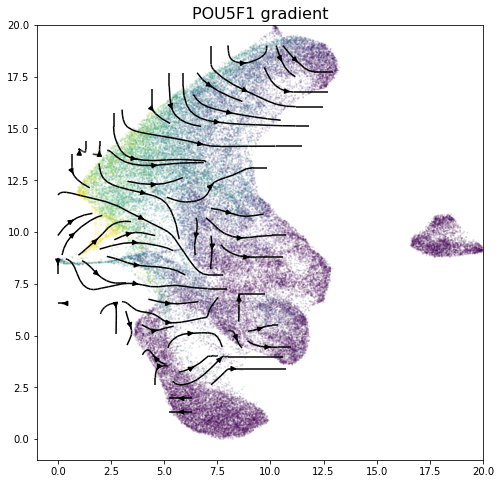

In [321]:
fig, ax = plt.subplots(figsize=(8,8))


ax.scatter(umap_scaled[:,0],
           umap_scaled[:,1],
           c = EXPR,
           s=1, 
           alpha=0.1, 
          vmin=0.5,
          vmax=np.quantile(EXPR, .98))

ax.streamplot(np.array(range(GSZ)), 
              np.array(range(GSZ)),
              vel_x[:, 1:].T,
              vel_y[1:].T, 
             color='k')

plt.title("{} gradient".format(rna.var['name'][GID]), size=16)
plt.xlim(-1, GSZ)
plt.ylim(-1, GSZ)

In [66]:
g = make_vec_field(rna.obsm['X_umap'], EXPR, 100)[2]
g[np.isnan(g)] = 0
g

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
g.shape

(101, 101)

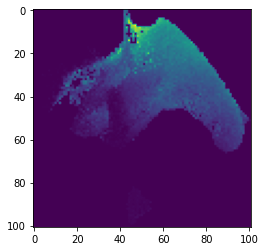

In [68]:
plt.imshow(g)

In [72]:
X, Y = np.meshgrid(np.arange(g.shape[0]), np.arange(g.shape[1]))
Z = g

In [73]:
from scipy import interpolate

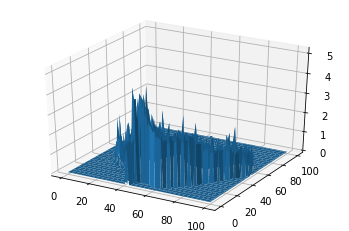

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [75]:
xnew, ynew = np.mgrid[-1:1:80j, -1:1:80j]
tck = interpolate.bisplrep(X, Y, Z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

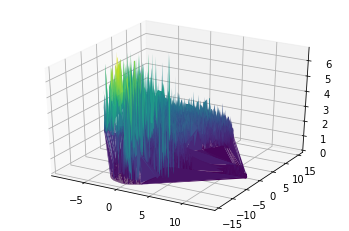

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(rna.obsm['X_umap'][:,0], rna.obsm['X_umap'][:,1], EXPR, cmap='viridis')
plt.show()